In [1]:
import numpy
import pandas
import matplotlib 
import seaborn
import sklearn

In [2]:
nRowsRead = None # specify 'None' if want to read whole file
df = pandas.read_csv('./data/Iris.csv', delimiter=',', nrows = nRowsRead)

In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

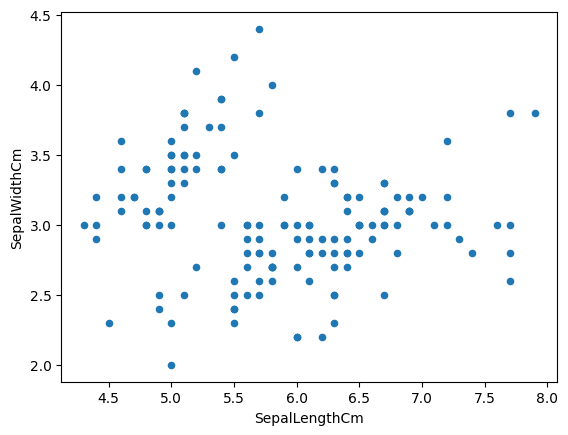

In [5]:
# pandas.DataFrame.plot.scatter(x, y, s=None, c=None, **kwargs)
# for only 2 vars
df.plot(
    kind='scatter',
    x='SepalLengthCm',
    y='SepalWidthCm',
)

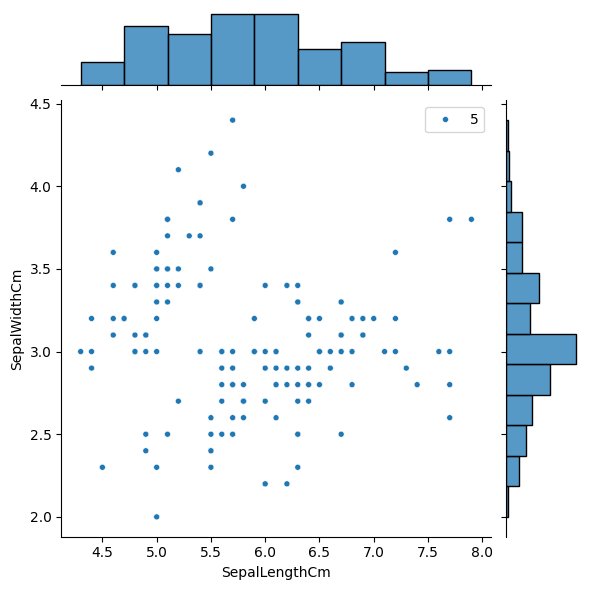

In [6]:
seaborn.jointplot(
    kind='scatter', # default
    x='SepalLengthCm',
    y='SepalWidthCm',
    data=df,
    size=5
)

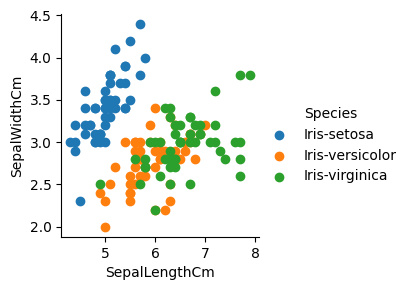

In [7]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
sns_species_colored = seaborn.FacetGrid(
    data=df,
    hue='Species',
    # row='SepalLengthCm',
    # col='SepalWidthCm',
)

mlt_plt_scatter = sns_species_colored.map(
    matplotlib.pyplot.scatter,
    'SepalLengthCm',
    'SepalWidthCm',
)

mlt_plt_scatter.add_legend()

matplotlib.pyplot.show()

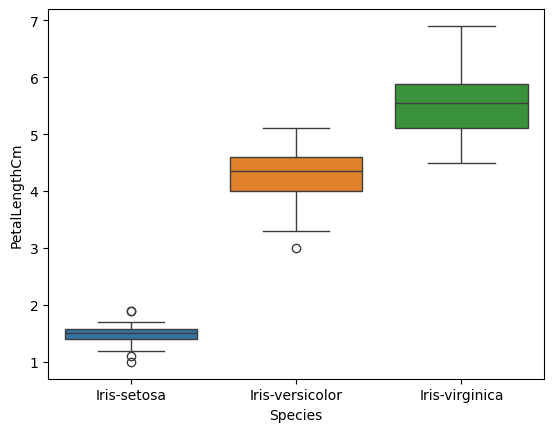

In [8]:
# boxblot seaborn to see individual feature
sns_boxplot = seaborn.boxplot(
    data=df,
    x='Species',
    hue='Species',
    y='PetalLengthCm',
)

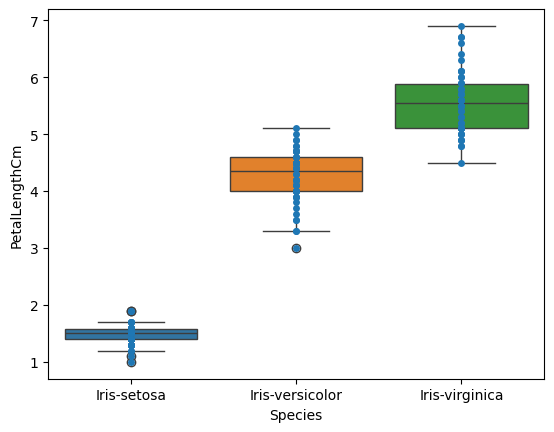

In [9]:
# adding layer on box plot with strip-plot 
sns_boxplot = seaborn.boxplot(
    data=df,
    hue='Species',
    x='Species',
    y='PetalLengthCm',
)
sns_strip_plot = seaborn.stripplot(
    data=df,
    x='Species',
    y='PetalLengthCm',
    jitter=False,
    edgecolor='grey'
)

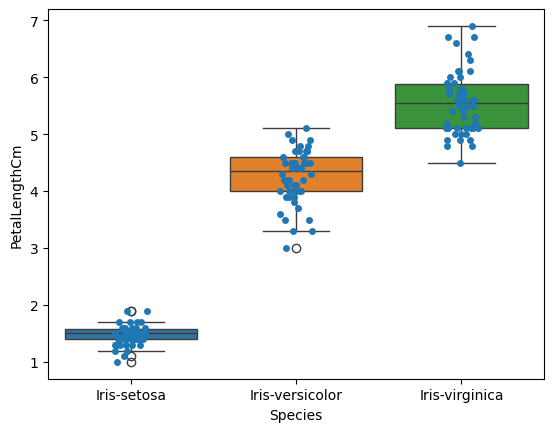

In [10]:
# adding layer on box plot with strip-plot 
sns_boxplot = seaborn.boxplot(
    data=df,
    hue='Species',
    x='Species',
    y='PetalLengthCm',
)
sns_strip_plot = seaborn.stripplot(
    data=df,
    x='Species',
    y='PetalLengthCm',
    jitter=True, # points in a plane
    edgecolor='grey'
)

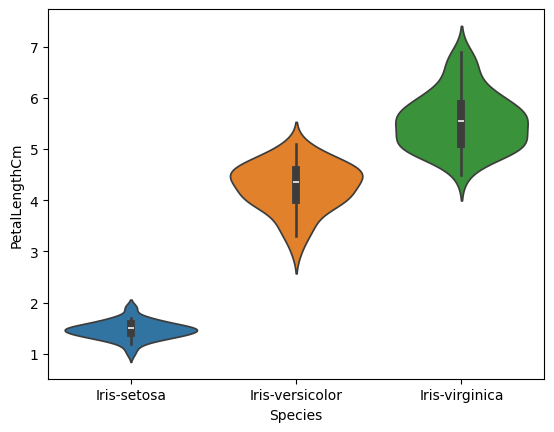

In [11]:
# violin plot (combination of above two)
sns_violin_plot = seaborn.violinplot(
    data=df,
    hue='Species',
    x='Species',
    y='PetalLengthCm',
)

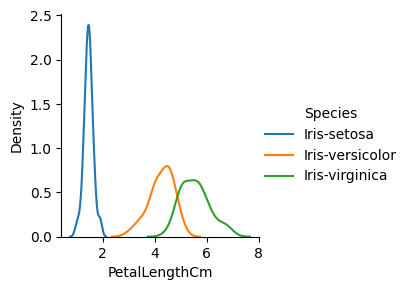

In [12]:
# a kernel density estimate of the underlying feature (univariate)
sns_facet_grid = seaborn.FacetGrid(
    data=df,
    hue='Species',
)
sns_kdeplot = sns_facet_grid.map(
    seaborn.kdeplot,
    'PetalLengthCm'
)

sns_kdeplot.add_legend()

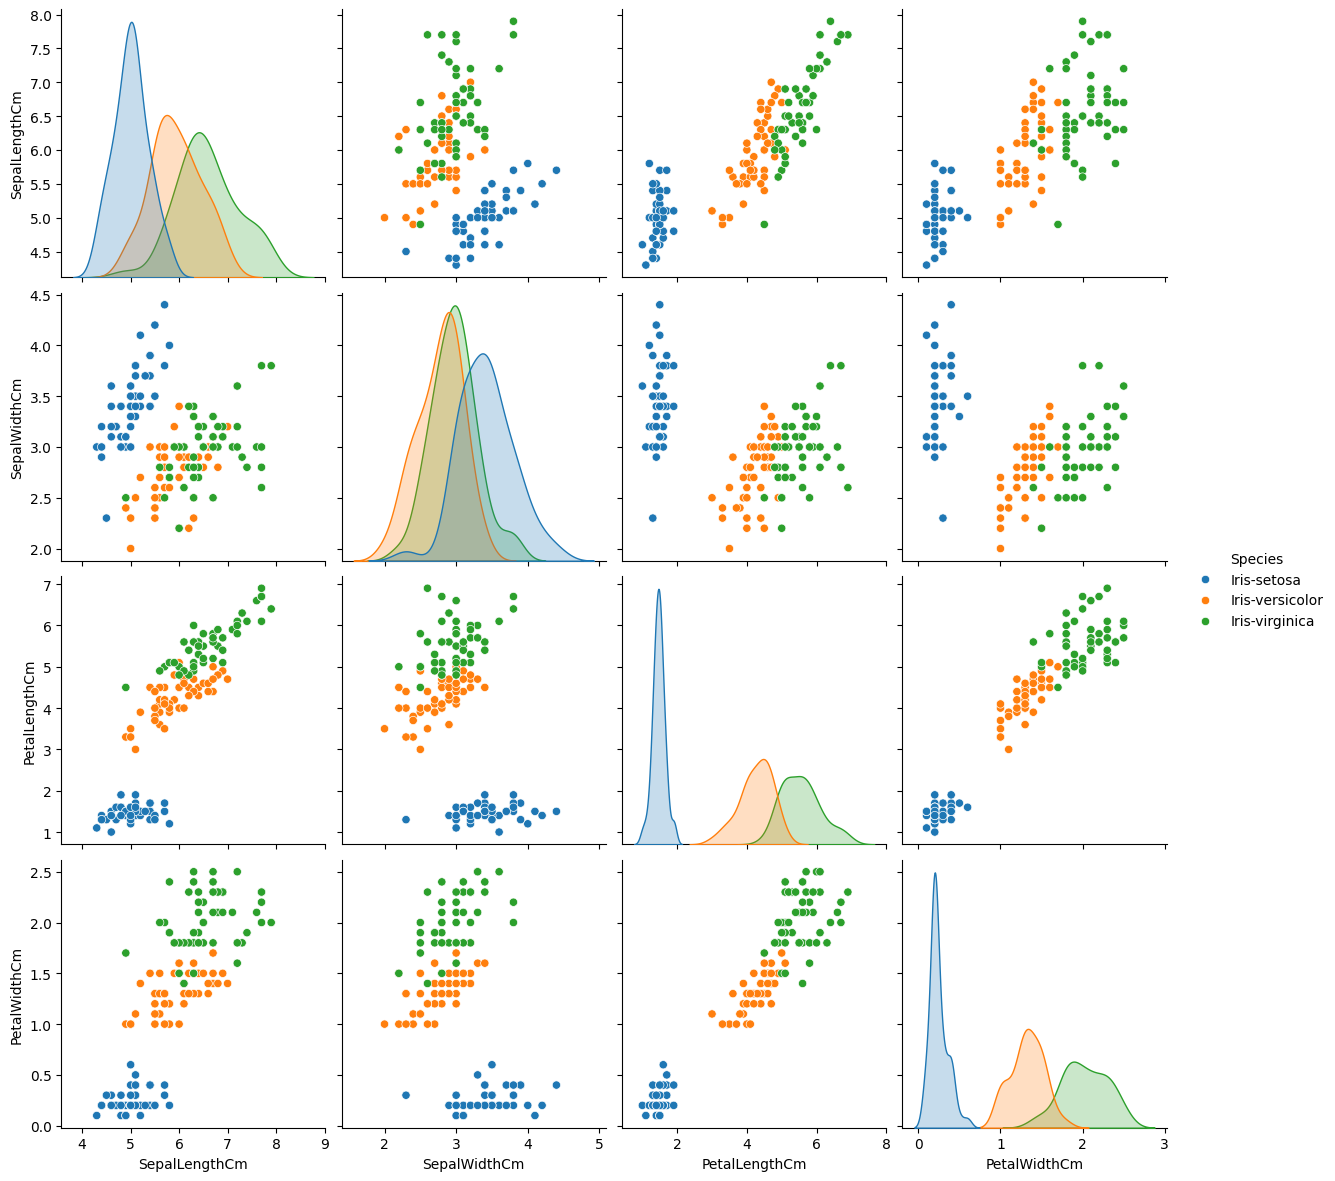

In [13]:
# pair plot for bivariate relations 
sns_pair_plot = seaborn.pairplot(
    df.drop("Id", axis=1),
    hue="Species",
    height=3
)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

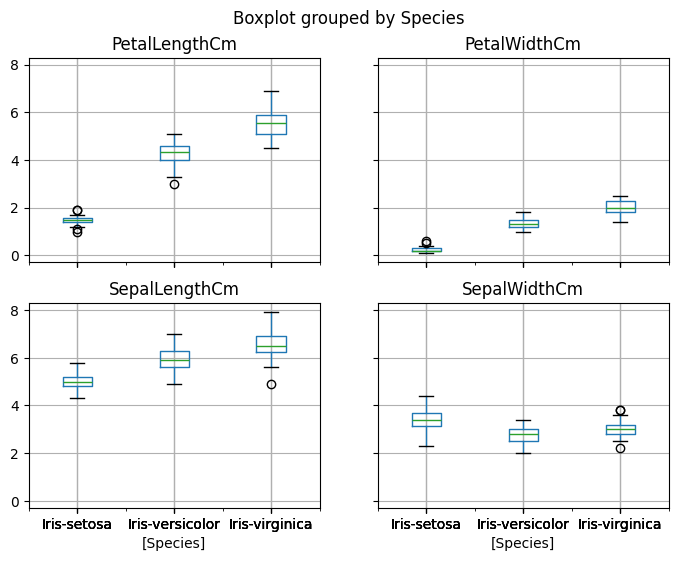

In [14]:
#  boxplot with Pandas on each feature split out by species
pd_boxplot = df.drop("Id", axis=1).boxplot(by='Species',figsize=(8,6))
pd_boxplot

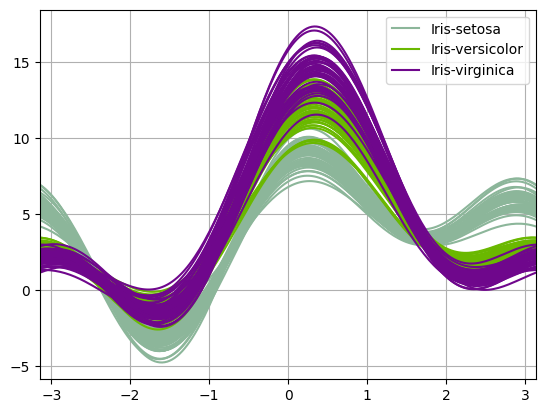

In [15]:
# pandas andrew curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series

pd_andrew_curves = pandas.plotting.andrews_curves(
    frame=df.drop('Id', axis=1), # remove Id 
    class_column='Species'
)

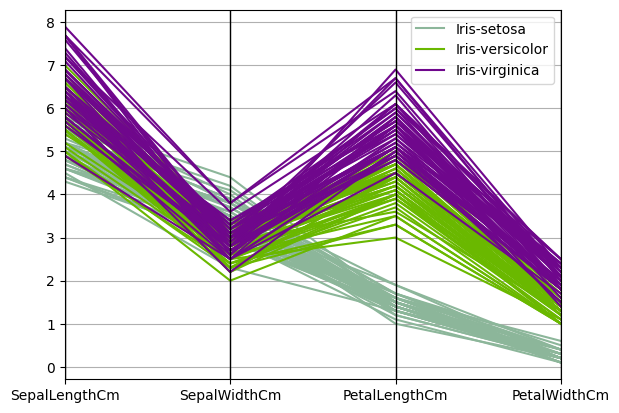

In [16]:
# similar is Parallel coordinates
pd_parallel_coordinates = pandas.plotting.parallel_coordinates(
    frame=df.drop("Id", axis=1),
    class_column='Species',    
)

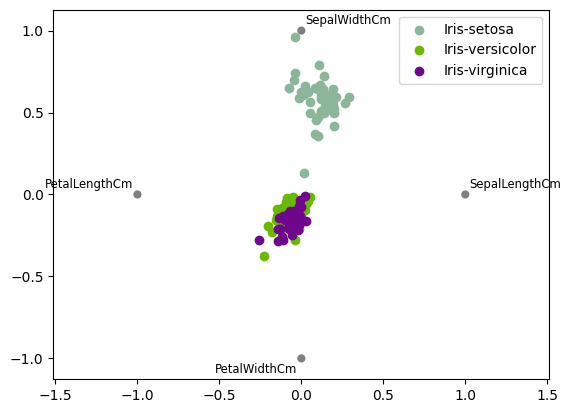

In [17]:
# multivariate visualization (radviz) in pandas
# Highly correlated `Series` in the `DataFrame` are placed closer on the unit circle.
pd_multivariate = pandas.plotting.radviz(
    frame=df.drop("Id", axis=1),
    class_column='Species',
)

In [18]:
labels = df["Species"]
df.drop(columns=["Id","Species"], axis=1, inplace=True)

In [19]:
X = pandas.DataFrame.copy(df)
y = pandas.Series.copy(labels)

In [20]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42 
)

In [21]:
# KNN: 
from sklearn import neighbors

# Classifier implementing the k-nearest neighbors vote
knn_classifier = neighbors.KNeighborsClassifier()

knn_folds_scores = model_selection.cross_val_score(
    estimator=knn_classifier,
    X=X,
    y=y,
    # cross validation strategy
    # split your dataset into training and validation 
    # folds when evaluating the model
    cv=7, 
)

knn_folds_scores.mean()

np.float64(0.9666048237476809)

In [22]:
# Naive Bayes:
from sklearn import naive_bayes

# GaussianNB: Gaussian Naive Bayes.
# BernoulliNB : Naive Bayes classifier for multivariate Bernoulli models.
# CategoricalNB : Naive Bayes classifier for categorical features.
# ComplementNB : Complement Naive Bayes classifier.
# MultinomialNB : Naive Bayes classifier for multinomial models.
naive_bayes_classifier = naive_bayes.GaussianNB()

naive_bayes_folds_scores = model_selection.cross_val_score(
    estimator=naive_bayes_classifier,
    X=X,
    y=y,
    cv=7, # cross validation strategy
)

naive_bayes_folds_scores.mean()

np.float64(0.953617810760668)

In [23]:
# Random Forest:
from sklearn import tree

decision_tree_classifier = tree.DecisionTreeClassifier()

decision_tree_folds_scores = model_selection.cross_val_score(
    estimator=decision_tree_classifier,
    X=X,
    y=y,
    cv=7, # cross validation strategy
)

decision_tree_folds_scores.mean()

np.float64(0.9465058750773038)

In [24]:
# Random Forest:
from sklearn import ensemble

# A random forest is a meta estimator that fits a number of decision tree
# classifiers on various sub-samples of the dataset and uses averaging to
# improve the predictive accuracy and control over-fitting.
random_forest_classifier = ensemble.RandomForestClassifier()

random_forest_folds_scores = model_selection.cross_val_score(
    estimator=random_forest_classifier,
    X=X,
    y=y,
    cv=7, # cross validation strategy
)

random_forest_folds_scores.mean()

np.float64(0.9533085961657389)

In [25]:
# SVM
from sklearn import svm

# C-Support Vector Classification.
support_vecotor_classifier = svm.SVC()

support_vecotor_folds_scores = model_selection.cross_val_score(
    estimator=decision_tree_classifier,
    X=X,
    y=y,
    cv=7, # cross validation strategy
)

support_vecotor_folds_scores.mean()

np.float64(0.9468150896722325)